In [18]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [19]:
alpha = 0.1
gamma = 0.95
epsilon = 0.2
episodes = 500

In [20]:
def create_bins(env, bins=(20, 20)):
    obs_space_high = env.observation_space.high
    obs_space_low = env.observation_space.low
    bins = [np.linspace(obs_space_low[i], obs_space_high[i], bins[i] - 1) for i in range(len(bins))]
    return bins

def discretize_state(state, bins):
    return tuple([np.digitize(state[i], bins[i]) for i in range(len(bins))])


In [21]:
def epsilon_greedy(Q, state, n_actions, epsilon):
    if np.random.rand() < epsilon:
        return np.random.randint(n_actions)
    return np.argmax(Q[state])


In [22]:
def sarsa(env, episodes, alpha, gamma, epsilon):
    n_actions = env.action_space.n
    bins = create_bins(env)
    Q = defaultdict(lambda: np.zeros(n_actions))
    returns = []

    for ep in range(episodes):
        state, _ = env.reset()
        state = discretize_state(state, bins)
        action = epsilon_greedy(Q, state, n_actions, epsilon)
        total_reward = 0

        done = False
        while not done:
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            next_state_discrete = discretize_state(next_state, bins)
            next_action = epsilon_greedy(Q, next_state_discrete, n_actions, epsilon)

            td_target = reward + gamma * Q[next_state_discrete][next_action]
            td_error = td_target - Q[state][action]
            Q[state][action] += alpha * td_error

            state = next_state_discrete
            action = next_action
            total_reward += reward

        returns.append(total_reward)

    return Q, returns


In [23]:
def plot_returns(returns):
    plt.plot(returns)
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.title('SARSA(0) on MountainCar')
    plt.grid()
    plt.show()


In [24]:
def simulate_policy(env, Q, bins):
    state, _ = env.reset()
    state = discretize_state(state, bins)
    done = False
    steps = 0
    while not done:
        action = np.argmax(Q[state])
        next_state, _, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
        state = discretize_state(next_state, bins)
        env.render()
        steps += 1
    env.close()
    return steps


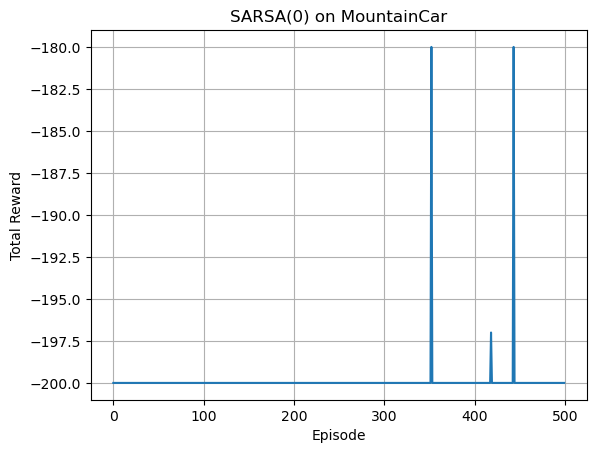

Steps to goal using learned SARSA(0) policy: 159


In [25]:
env = gym.make('MountainCar-v0')
Q, returns = sarsa(env, episodes, alpha, gamma, epsilon)
plot_returns(returns)
steps_taken = simulate_policy(env, Q, create_bins(env))
print(f"Steps to goal using learned SARSA(0) policy: {steps_taken}")


# Q-Learning Algorithm

In [26]:
def q_learning(env, episodes, alpha, gamma, epsilon):
    n_actions = env.action_space.n
    bins = create_bins(env)
    Q = defaultdict(lambda: np.zeros(n_actions))
    returns = []

    for ep in range(episodes):
        state, _ = env.reset()
        state = discretize_state(state, bins)
        total_reward = 0
        done = False

        while not done:
            action = epsilon_greedy(Q, state, n_actions, epsilon)
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            next_state_discrete = discretize_state(next_state, bins)

            # Q-Learning update
            best_next_action = np.argmax(Q[next_state_discrete])
            td_target = reward + gamma * Q[next_state_discrete][best_next_action]
            Q[state][action] += alpha * (td_target - Q[state][action])

            state = next_state_discrete
            total_reward += reward

        returns.append(total_reward)

    return Q, returns, bins


# Plotting Returns

In [27]:
def plot_returns(returns, title="Returns per Episode"):
    plt.plot(returns)
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.title(title)
    plt.grid()
    plt.show()

# Simulate Learned Strategy

In [28]:
def simulate_policy(env, Q, bins, render=True):
    state, _ = env.reset()
    state = discretize_state(state, bins)
    done = False
    steps = 0

    while not done:
        action = np.argmax(Q[state])
        next_state, _, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
        state = discretize_state(next_state, bins)
        if render:
            env.render()
        steps += 1

    env.close()
    return steps


# Run Q-Learning

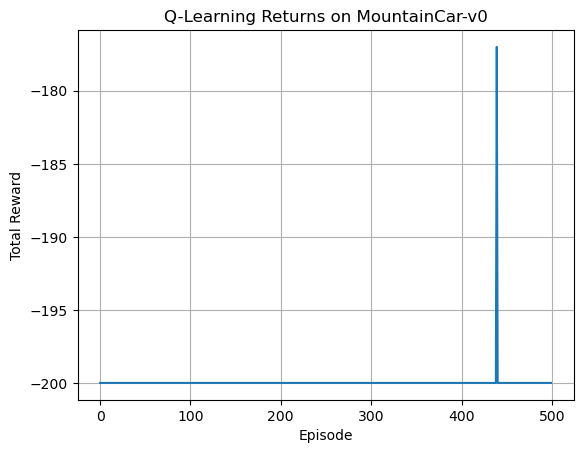

Steps to goal using Q-learning policy: 200


In [29]:
env = gym.make('MountainCar-v0')
Q_qlearn, qlearn_returns, bins = q_learning(env, episodes, alpha, gamma, epsilon)
plot_returns(qlearn_returns, title="Q-Learning Returns on MountainCar-v0")
steps = simulate_policy(env, Q_qlearn, bins)
print(f"Steps to goal using Q-learning policy: {steps}")


# Comparison with SARSA(0)

In [31]:
Q_sarsa, sarsa_returns = sarsa(env, episodes, alpha, gamma, epsilon)

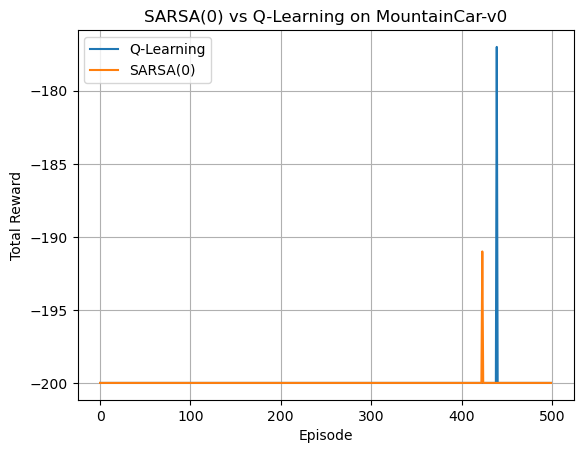

In [32]:
plt.plot(qlearn_returns, label="Q-Learning")
plt.plot(sarsa_returns, label="SARSA(0)")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("SARSA(0) vs Q-Learning on MountainCar-v0")
plt.legend()
plt.grid()
plt.show()